# Deep NLP Framework Demo: Movie Review Dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [Stanford movie review corpus](https://nlp.stanford.edu/sentiment/) corpus.  This dataset contains hand written digits and their labels.

In [1]:
# a small and simple class to import local libraries, and ommited for brevity
from harness import NotebookHarness
harness = NotebookHarness()
mng = harness()

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [2]:
facade = mng.create_facade('demo')
facade.executor.write()

model: Review: glove_50 
feature splits:
    split stash splits:
            dev: 1029 (9.2%)
            test: 2099 (18.7%)
            train: 8086 (72.1%)
            total: 11214
    total this instance: 11214
    keys consistent: True
batch splits:
    split stash splits:
            dev: 6 (10.3%)
            test: 11 (19.0%)
            train: 41 (70.7%)
            total: 58
    total this instance: 58
    keys consistent: True
    delegate:
        name: batch_stash
        chunk_size: 0
        workers: 2
        batch_size: 200
        data_point_id_sets_path: ../data/batch/batch-point-keys.dat
        batch_limit: 9223372036854775807
        delegate_attr: True
        _has_data: True
        is_child: False
        _decoded_attributes: {'glove_50_embedding', 'label'}
        priming: False


## Train and test the model

For the first run, use exceptionally poor parameters to demonstrate incremental process by tuning and configuring the model.  These initial parameters and input embeddings are:
* learning rate: 0.1
* drop out: 0.8
* epochs: 20
* embeddings: Glove 50 dimension

tr:13217.787|va min:27059.781|va:39229.444|lr:0.1 /\: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s]  


Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.1
    train:
        started: 07/01/2021 17:35:46:547042
        ended: 07/01/2021 17:36:02:002762
        batches: 41
        ave data points per batch/total: 197.2/8086
        converged/epochs: 19/20
        min/ave/max loss: 35.35051/12083.46388/76791.30249
        accuracy: 0.546 (4415/8086)
        micro: F1: 0.546, precision: 0.546, recall: 0.546
        macro: F1: 0.466, precision: 0.617, recall: 0.547
        weighted: F1: 0.466, precision: 0.617, recall: 0.546
    validation:
        batches: 6
        ave data points per batch/total: 171.5/1029
        converged/epochs: 19/20
        min/ave/max loss: 0.00000/27059.78088/63235.31494
        accuracy: 0.498 (512/1029)
        micro: F1: 0.498, precision: 0.498, recall: 0.498
        macro: F1: 0.332, precision: 0.249, recall: 0.500
        weighted: F1: 0.331, precision: 0.248, recall: 0.498
    test:
        started: 07/01/2021 17:36:02:253529
        ended: 07/01/2021

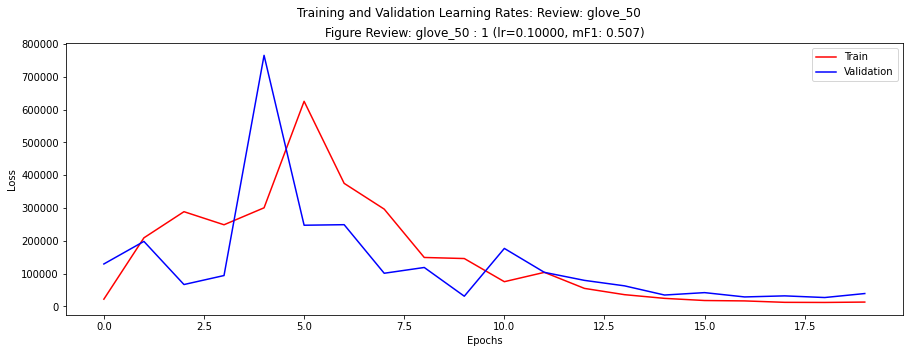

In [3]:
mng.run()

## Tune hyperparameters

The API provides direct access to all the (hyper)parameters.  Let's set the learning rate to get a better SGD trajectory.

tr:138.616|va min:117.267|va:117.350|lr:0.001 /\: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
    train:
        started: 07/01/2021 17:36:26:699020
        ended: 07/01/2021 17:36:46:261506
        batches: 41
        ave data points per batch/total: 197.2/8086
        converged/epochs: 20/20
        min/ave/max loss: 55.85068/138.61556/146.04764
        accuracy: 0.466 (3765/8086)
        micro: F1: 0.466, precision: 0.466, recall: 0.466
        macro: F1: 0.400, precision: 0.440, recall: 0.466
        weighted: F1: 0.400, precision: 0.440, recall: 0.466
    validation:
        batches: 6
        ave data points per batch/total: 171.5/1029
        converged/epochs: 19/20
        min/ave/max loss: 18.71466/117.26741/143.67813
        accuracy: 0.531 (546/1029)
        micro: F1: 0.531, precision: 0.531, recall: 0.531
        macro: F1: 0.410, precision: 0.692, recall: 0.533
        weighted: F1: 0.408, precision: 0.693, recall: 0.531
    test:
        started: 07/01/2021 17:36:46:489988
        ended: 07/01/2021 17:3

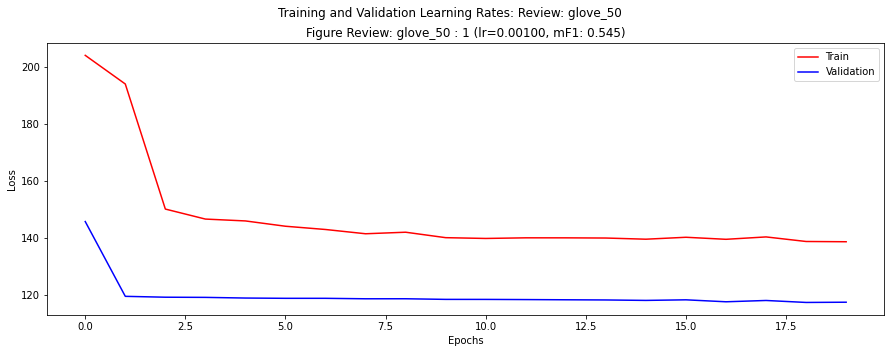

In [4]:
facade.learning_rate = 1e-3
mng.run()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

tr:123.189|va min:97.349|va:97.027|lr:0.001 \/: 100%|██████████| 40/40 [00:46<00:00,  1.17s/it]  


Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
    train:
        started: 07/01/2021 17:36:55:759723
        ended: 07/01/2021 17:37:42:201322
        batches: 41
        ave data points per batch/total: 197.2/8086
        converged/epochs: 40/40
        min/ave/max loss: 31.14918/123.18890/143.81071
        accuracy: 0.657 (5313/8086)
        micro: F1: 0.657, precision: 0.657, recall: 0.657
        macro: F1: 0.657, precision: 0.658, recall: 0.657
        weighted: F1: 0.657, precision: 0.658, recall: 0.657
    validation:
        batches: 6
        ave data points per batch/total: 171.5/1029
        converged/epochs: 40/40
        min/ave/max loss: 12.42937/97.02681/130.69940
        accuracy: 0.719 (740/1029)
        micro: F1: 0.719, precision: 0.719, recall: 0.719
        macro: F1: 0.716, precision: 0.729, recall: 0.720
        weighted: F1: 0.716, precision: 0.729, recall: 0.719
    test:
        started: 07/01/2021 17:37:42:729024
        ended: 07/01/2021 17:37

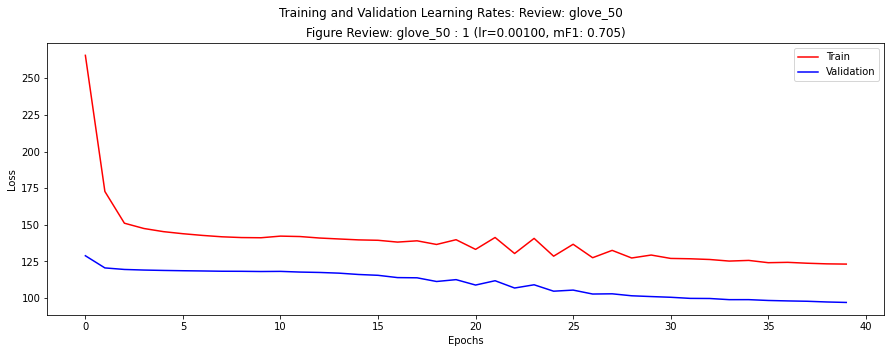

In [5]:
facade.dropout = 0.1
facade.epochs = 40
mng.run()

## Test using linguistic features

Add dependency tree token depth and an enumeration of the spaCy feature as concatenated input to the embedding layer, which marginally increases performance for this model.

tr:118.571|va min:94.434|va:94.040|lr:0.001 \/: 100%|██████████| 40/40 [00:48<00:00,  1.20s/it]  


Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
    train:
        started: 07/01/2021 17:38:05:816312
        ended: 07/01/2021 17:38:53:712626
        batches: 41
        ave data points per batch/total: 197.2/8086
        converged/epochs: 40/40
        min/ave/max loss: 24.40091/118.57140/141.40480
        accuracy: 0.681 (5507/8086)
        micro: F1: 0.681, precision: 0.681, recall: 0.681
        macro: F1: 0.681, precision: 0.682, recall: 0.681
        weighted: F1: 0.681, precision: 0.682, recall: 0.681
    validation:
        batches: 6
        ave data points per batch/total: 171.5/1029
        converged/epochs: 40/40
        min/ave/max loss: 11.34991/94.03968/132.74246
        accuracy: 0.734 (755/1029)
        micro: F1: 0.734, precision: 0.734, recall: 0.734
        macro: F1: 0.731, precision: 0.743, recall: 0.734
        weighted: F1: 0.731, precision: 0.744, recall: 0.734
    test:
        started: 07/01/2021 17:38:54:640376
        ended: 07/01/2021 17:38

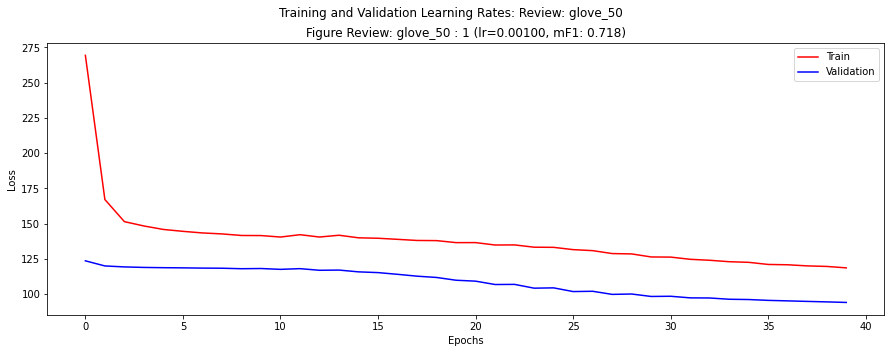

In [6]:
facade.language_attributes = {'dependencies', 'enums'}
mng.run()

## Test with different embeddings

The facade quick features swapping, which switches to the Google 300B pretrained word2vec embedding already vectorized in ready to go batches.

tr:95.693|va min:85.591|va:85.508|lr:0.001 \/: 100%|██████████| 40/40 [00:53<00:00,  1.34s/it]   


Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
    train:
        started: 07/01/2021 17:41:49:383353
        ended: 07/01/2021 17:42:41:156533
        batches: 41
        ave data points per batch/total: 197.2/8086
        converged/epochs: 40/40
        min/ave/max loss: 18.76689/95.69315/124.44896
        accuracy: 0.762 (6161/8086)
        micro: F1: 0.762, precision: 0.762, recall: 0.762
        macro: F1: 0.762, precision: 0.762, recall: 0.762
        weighted: F1: 0.762, precision: 0.762, recall: 0.762
    validation:
        batches: 6
        ave data points per batch/total: 171.5/1029
        converged/epochs: 40/40
        min/ave/max loss: 8.65006/85.50795/117.61642
        accuracy: 0.762 (784/1029)
        micro: F1: 0.762, precision: 0.762, recall: 0.762
        macro: F1: 0.761, precision: 0.765, recall: 0.762
        weighted: F1: 0.761, precision: 0.765, recall: 0.762
    test:
        started: 07/01/2021 17:42:46:133024
        ended: 07/01/2021 17:42:4

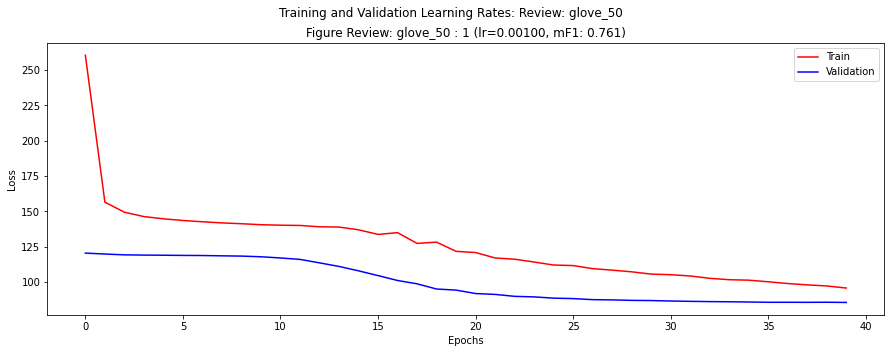

In [7]:
facade.embedding = 'word2vec_300_embedding'
mng.run()

# Test with BERT embeddings

Test with BERT embedings.  Because our model has the same network architecture, which is *embeddings -> LSTM -> decoder -> softmax* the full last hidden layer is given as input to the LSTM.  Projects can dynamically switch models, but this demo does not.

tr:63.537|va min:63.193|va:63.510|lr:2e-06 /\: 100%|██████████| 25/25 [11:42<00:00, 28.11s/it]  


Name: Review: transformer_trainable : 1
Run index: 2
Learning rate: 2e-06
    train:
        started: 07/01/2021 17:43:25:511696
        ended: 07/01/2021 17:55:07:743794
        batches: 41
        ave data points per batch/total: 197.2/8086
        converged/epochs: 25/25
        min/ave/max loss: 10.55632/63.53686/98.33280
        accuracy: 0.873 (7062/8086)
        micro: F1: 0.873, precision: 0.873, recall: 0.873
        macro: F1: 0.873, precision: 0.877, recall: 0.873
        weighted: F1: 0.873, precision: 0.877, recall: 0.873
    validation:
        batches: 6
        ave data points per batch/total: 171.5/1029
        converged/epochs: 23/25
        min/ave/max loss: 10.02036/63.19251/79.98107
        accuracy: 0.852 (877/1029)
        micro: F1: 0.852, precision: 0.852, recall: 0.852
        macro: F1: 0.852, precision: 0.854, recall: 0.852
        weighted: F1: 0.852, precision: 0.854, recall: 0.852
    test:
        started: 07/01/2021 17:55:09:889249
        ended: 07/01/

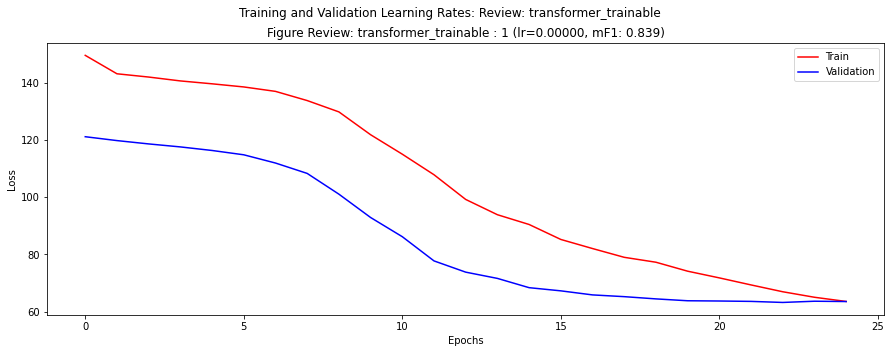

In [8]:
facade = mng.create_facade('transformer-trainable')
facade.model_settings.optimizer_params = {'weight_decay': 0.005}
facade.model_settings.scheduler_params = {'patience': 3}
facade.epochs = 25
mng.run()